## Summary of Political Stance Tweets Project

This project is an extension to the political stance experiment research. To examine corporate stance-taking in action, I scraped tweets from Fortune 100 company and CEO twitter accounts around the George Floyd Murder in Minneapolis (May 25, 2020). I then had [Upworkers](https://www.upwork.com/) label each tweet which took a stance on this event. I finish by attempting to use Tweet content to predict political stances and compare stance-taking activities among companies with different underlying political leanings.

Corporate political stance-taking has critical implications for strategic outcomes, as discussed in the [paired summary of my experimental research](../summaries/ExpmtSummary.html). Deploying low-cost methods to predict stances, and company and individual behavior around stance-taking, has several practical strategic benefits. For example, the ability to accurately predict political stance tweets can be a source of competitive advantage in public relations when responding to peer firms' communications. Researchers have shown that a ["wait then quickly imitate"](https://journals.sagepub.com/doi/abs/10.2189/asqu.53.3.460?casa_token=RimO4bscEWsAAAAA:n32Tb-FI6baPzBcKgGkJKB9-Hj5A4cbJnZSnVGbndVI1_VULna0VrIiW4ztEr6eOn9w95rKiXHgErg) strategy helps mitigate downside risk among large firms facing contentious social issues. In this case, if your closest peers take a stance, then you may want to quickly take a stance to avoid being labeled in the media as [ignoring](https://www.forbes.com/sites/martyswant/2021/04/19/silence-is-not-an-option-research-shows-consumers-expect-ceos-to-take-a-stand-on-political-issues/?sh=373ea67446c6) stakeholder concerns. Accurate identification of peer tweets is fundamental to successful implementation of this strategy.

My objectives with this project are:

1. Provide an in-depth investigation of the "anatomy" of a corporate political stance following an intense socio-political event. Do these stances attract outsized attention compared to other tweets? How do CEO tweets and corporate tweets differ?

2. Conduct a baseline machine-learning exercise to predict stance tweets on race relations and police reform. How well can we predict a stance tweet? What are the relative costs of misidentification?

3. Examine how stakeholders' and organizations' political ideologies impact stance-taking activities. Do companies with employees of different political leanings differ in their stance-taking strategies? 

### Descriptive Statistics and Graphics

I begin by examining the unlabeled tweet data. I scraped[^1] Tweet data from all available Fortune 100 company accounts and associated CEOs within a 21 day window before and after the May 25th event date. Scraping code (scrape_tweets.py) can be found in the [src directory](https://github.com/patrickrooneyphd/Political-Stance-Tweets/tree/master/src) of the project's Github repository.

As a start, I first examine tweets with high levels of engagement, using number of replies as a proxy for engagement, and compare them with the full sample. The roughly 25 tweets with more than 500 replies differ significantly on many features compared to the full sample. For example:

1. The most common Tweet platform in the full sample is a customer experience management platform (Sprinklr) and is the Twitter Web App in the high replies subsample. The high-reply tweets appear more likely to be broad public announcements and not individual customer service correspondence.

2. The average user attached to each tweet in the high-replies subsample has more followers, fewer friends, and fewer statuses than those in the full sample. Combined with patterns mentioned in (1), it seems like a greater proportion of these high reply tweets are coming from publicity-friendly CEOs, who tend to engage with Twitter much less often than the average company account but maintain a strong presence among their followers. Finally, the average tweet in the high replies sample occurs after the Floyd Murder, whereas the average tweet in the full sample occurs a few days before it. This provides some justification for the hypothesis that stance tweets might be more likely to attract attention. 

**Abbreviated Summary Statistics: Full Sample**

In [1]:
from summary_functions import *
%matplotlib inline
df_1_a = pd.read_pickle('df_1_a.pkl')

var_list = ['replies', 'source_label', 'ceo_account', 'user_followers', 'user_friends', 'user_statuses', 'days_from_event']

df_1_a[var_list].describe()

AttributeError: 'DataFrame' object has no attribute '_data'

**Abbreviated Summary Statistics: High Replies Sample**

In [ ]:
df_1_a[var_list][df_1_a['replies']>500].describe()

Looking directly at some of the tweets with more than 500 replies, we see that a large number of them appear to be stances on racial justice and equity and come from CEO accounts. While the table abbreviates the text of each tweet, those occurring after the event are much more likely to use phrasing associated with stances on racial equity (e.g., "stands in solidarity", "unfinished work of racial justice").

**Sample of Tweets from the High-Replies Sample**

In [3]:
df_1_a[['text', 'username', 'replies', 'days_from_event']][df_1_a['replies']>500].head(15)

,text,username,replies,days_from_event
4,Today on US Google &amp; YouTube homepages we ...,sundarpichai,1737,6
18,The unfinished work of racial justice and equa...,tim_cook,1215,17
1339,"Today Googlers are holding an 8-minute, 46-sec...",Google,569,9
3381,Amazon stands in solidarity with the Black com...,amazon,1343,9
3383,https://t.co/yI4MYEDz4C,amazon,5093,6
15207,We're all in for the release of the #JusticeLe...,ATT,521,-5
16521,Who would you rather caddie for? #CapitalOnesT...,CapitalOne,1113,-2
16570,black lives matter. words from our leaders: ht...,Chevron,902,11
17336,"Racism, hate and inequality have no place in o...",comcast,1233,14
18465,Hatred and discrimination have no place in our...,JohnDeere,655,18


Further descriptive analysis shows when these high-reply tweets are occurring relative to the full sample. Below are overlaid kernel density plots that show the relative density of tweets using various cutoffs for the number of replies. Interestingly, the tweets with the most replies are more likely to occur in the week following the Floyd Murder, which coincides with the emergence of large-scale demonstrations for racial equity and police reform. 

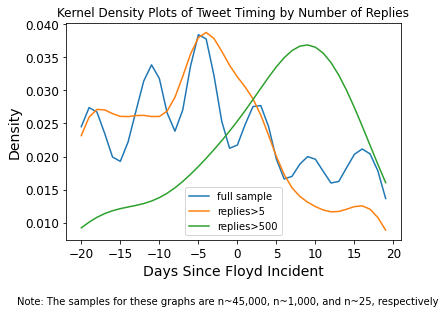

In [4]:
# Kdensity Graph
draw_kdensity_graph(df_1_a)

Getting more granular, we see that the number of replies per tweet per day spikes around 7 days following the event.

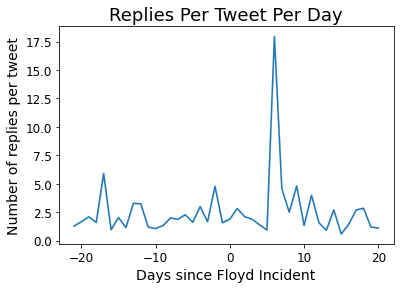

In [5]:
# Retweets per tweet per day (in 4.) 1
df_1_b = pd.read_pickle('df_1_b.pkl')
draw_replies_tweet_day_graph(df_1_b)

Interestingly, the language used in the 500+ replies sample differs from the subsample of CEO tweets, both of which are markedly different from the full sample. 

The full sample appears to mostly contain words relating to customer service inquiries. This aligns well with the large number of tweets sourced through customer experience management platforms ("record locator", "confirmation number"). The high replies tweets tend to have strong emphasis on action words relating to race and equity ("black", "community", "committed"). The CEO word sample appears to have less of a specific topical focus than the other two samples, but it seems to contain words with a markedly more positive sentiment ("proud", "thank").

In [1]:
# Use df_2.pkl, Ready for Notebook 2, "3. Wordclouds of Tweet Text and Sentiment"
# Word clouds (Full Sample, Most-replied-to Tweets, CEO Sample) 1
from summary_functions import *
df_2 = pd.read_pickle('df_2.pkl')

full_sample_string = ' '.join(df_2['text_clean'])
high_replies_string = ' '.join(df_2['text_clean'][df_2['replies']>500])
ceo_accounts_string = ' '.join(df_2['text_clean'][df_2['ceo_account']==1])

# make_word_cloud(full_sample_string, 'Full Sample')
# make_word_cloud(high_replies_string, '500+ Replies Sample')
# make_word_cloud(ceo_accounts_string, 'CEO Accounts Sample')

We also see differences in sentiment among different subsamples. CEO tweets do tend to be more positive than all other types of tweets, while tweets with the most replies are slightly negative in tone. High reply tweets also tend to be less subjective than those in the full sample or from CEOs.

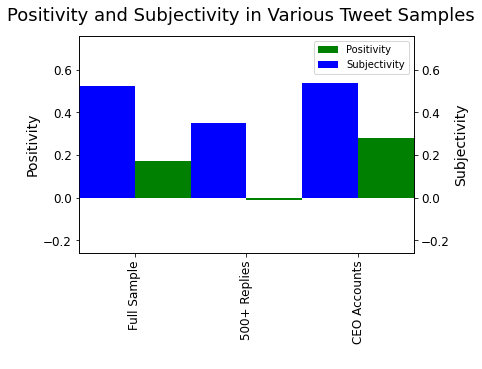

In [2]:
# Sentiment analysis results (in bar-chart form)  1

samples = {'Full Sample': full_sample_string, "500+ Replies": high_replies_string, 'CEO Accounts': ceo_accounts_string}
sntmt = return_sntmts(samples)

sntmt_df = pd.DataFrame(return_sntmts(samples), columns=['Polarity', 'Subjectivity', 'Sample'])
sntmt_df.set_index('Sample', drop=True, inplace=True)

draw_sentiment_graph(sntmt_df['Polarity'], sntmt_df['Subjectivity'], len(samples), "Positivity and Subjectivity in Various Tweet Samples")

### Predicting a Political Stance

After taking a look at the unlabeled data, I then had a team of 12 Upworkers label the tweets as "stance" or "no stance" tweets. After manually cross-checking the work, I was left with 290 tweets that were either initial stances or follow-ups to an initial stance among these companies. 

The stance tweets tend to be less positive and more objective than the non-stance tweets, which also echoes the differences seen between the high-replies subsample and full sample. The most used bigrams also are unsurprising, with non-stance tweets dealing with customer service inquiries and stance tweets mostly dealing with race and discrimination.

In [ ]:
# Use df_3.pkl, ready starting at Notebook 3, Ctrl-F line df['stemmed_text'].fillna
df_3 = pd.read_pickle('df_3.pkl')

action_stems_str = ' '.join(df_3['stemmed_text'][df_3['floyd_action']==1])
nonaction_stems_str = ' '.join(df_3['stemmed_text'][df_3['floyd_action']==0])

samples = {'Stance': action_stems_str, "Non-Stance": nonaction_stems_str}
sntmt = return_sntmts(samples)

sntmt_df = pd.DataFrame(return_sntmts(samples), columns=['Polarity', 'Subjectivity', 'Sample'])
sntmt_df.set_index('Sample', drop=True, inplace=True)

draw_sentiment_graph(sntmt_df['Polarity'], sntmt_df['Subjectivity'], len(samples), "Positivity and Subjectivity in Stance/Non-Stance Tweet Samples")

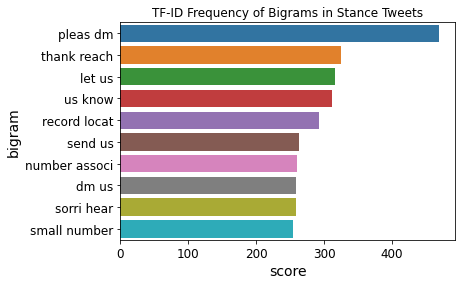

In [8]:
# Most used bigrams graph (stance/no stance) 1

nonstance_vec = TfidfVectorizer(ngram_range=(2,2))
stance_vec = TfidfVectorizer(ngram_range=(2,2))

draw_bigram_graph(nonstance_vec, df_3['stemmed_text'][df_3['floyd_action']==0], 'TF-ID Frequency of Bigrams in Non-Stance Tweets')

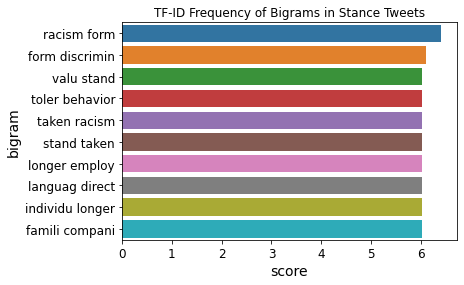

In [10]:
draw_bigram_graph(stance_vec, df_3['stemmed_text'][df_3['floyd_action']==1], 'TF-ID Frequency of Bigrams in Stance Tweets')

Below, I briefly summarize the methods and findings from this prediction exercise. More detail can be found in [this notebook](1.0-pjr-3-modeling-prediction-labeled-data.ipynb).

I stemmed all of the text using the [Snowball Stemmer](http://snowball.tartarus.org/algorithms/english/stemmer.html), which gradually removes suffixes based on patterns and exceptions in English syntax. Due to computational complexity, I rank the top 100 unigram stems from each of the stance and no-stance class and use them for the machine learning model selection process. In the feature vector, I also include other information about the tweet (e.g., replies) and the user (e.g., number of days on Twitter). I then standardize and one-hot encode relevant variables.

The data is highly imbalanced between non-stance and stance tweets, so I stratify the random train-test split on the target (stance/no-stance) to ensure balance in the train and test sets. To train my models, I test various resampling techniques, preferring the SMOTE oversampling technique which leads to the greatest F1 values. I choose to further tune hyperparameters from two models due to their strengths in precision (Random Forest) and recall (Logistic Regression) among the models tested using the preferred SMOTE technique.  

Testing these tuned models on our test set reveals that these models perform roughly equally on the F1 metric, with the random forest model performing slightly better. Interestingly, the logistic regression model has better recall, while the random forest model has better precision. Thus, either model could be useful depending on the business needs of the firm.

* The logistic regression's high recall could be useful for a company trying to see if a specific rival made a stance tweet (assuming that manually filtering through some false positive tweets wasn't too arduous). 

* If a company is looking for generic language to craft their own stance tweet, a more concentrated set of "true positive" examples from the Random Forest model might give them a sense of appropriate messaging, which could be quite useful on an especially sensitive topic (like race relations).

**Model Evaluation Results**

In [4]:
test_df = pd.read_pickle('df_test_chart.pkl')
test_df

,Accuracy,Balanced Accuracy,Precision,Recall,F1
Logistic Regression,0.995426,0.929216,0.625000,0.862069,0.724638
Random Forest,0.997231,0.827404,0.926829,0.655172,0.767677


Confusion matrices further show this tradeoff. Specifically, among those predicted as stance tweets in the random forest model, a high fraction are actual stance tweets (38/41), but a large fraction of the total actual stance tweets in the sample are incorrectly classified (20/58). The logistic regression classifies a large fraction of stance tweets correctly (50/58), but a large fraction of tweets predicted to be stance tweets are incorrectly classified (30/80).

<img src="conf_matrix_lr.png"/>

<img src="conf_matrix_rf.png"/>

### Company Political Orientations

While it is useful to be able to predict stance-taking among peers, the relative benefits of this tool will depend on firm specific factors. One of these factors could be the politics of the firm's stakeholders. In the paired experiment, I find that liberals treat stance-taking as social advocacy, while conservatives tend to treat it as a means to realize their firms' shareholder profitability mandate. 

To examine potential differential effects, I assign corporate political orientations to companies using the broad outline detailed in [Gupta et al. (2017)](https://doi.org/10.1002/smj.2550). Given that the data is not publicly available in completed form, I followed the detailed instructions provided by the paper to download, clean, and aggregate the data from the [Federal Election Commission](https://www.fec.gov/data/receipts/individual-contributions/?two_year_transaction_period=2022&min_date=01%2F01%2F2021&max_date=12%2F31%2F2022) campaign finance database of individual contributions. After downloading all employee donations from national elections from 2012-2020 and merging with the existing data on company tweets, I created indices of Democratic donation orientation among stakeholders.[^2]

Below is a frequency histogram of organization Democratic orientations. Among the Fortune 100, firm orientation is slightly skewed towards Democratic activity relative to Republican activity. This is different from previous work, who show a more conservative tilt across the entire Fortune 500 from the prior decade (roughly 2000-2010).

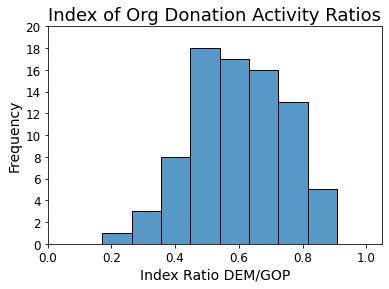

In [12]:
# Start with df_4_companies.pkl, Notebook 5, Index of Org Donation Activity Ratios Chart
# Company donations bar chart
df_4_companies = pd.read_pickle('df_4_companies.pkl')

draw_org_donation_graph(df_4_companies)

The political orientation of a company's employees is associated with the date on which the company took a stance. Specifically, companies that have a higher percentage of Democratic-donating employees were more likely to take a stance earlier[^3]. In general, it appears that taking a stance quickly after an event dealing with racial inequity may be more important for firms with Democratic-leaning stakeholders. While this trend is only correlational in nature, it does align well with my experimental evidence that liberals are more "reactive" to the underlying stance causes than conservatives. Assuming that Democratic-leaning firms have stakeholders and shareholders that demand swift and meaningful corporate stances on social justice issues, these findings would have critical strategic implications for managing brand image and consumer loyalty.

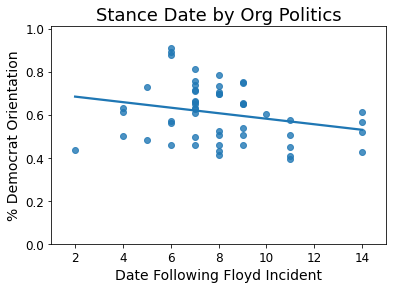

In [14]:
# Start with df_4_full.pkl, Notebook 5, "df_floyd_one" df declaration cell.
# Stance date by Org Politics graph 1
df_4_full = pd.read_pickle('df_4_full.pkl')
# Remove government entities (Fannie Mae and Freddie Mac)
draw_org_politics_time_stance_graph(df_4_full)

References:

[1]: I initially attempted to scrape this data as an Academic user of Twitter's API. After encountering difficulties scraping historical tweets, I turned to the Github package [snscrape](https://github.com/JustAnotherArchivist/snscrape). A week after scraping the Tweets, Twitter [announced](https://blog.twitter.com/developer/en_us/topics/tools/2021/enabling-the-future-of-academic-research-with-the-twitter-api) a free historical search functionality for academics.  

[2]: This index is an average of Democratic donation activity measures that are a percent of total activity on four dimensions: donation amounts, number of donations, number of unique donors, number of unique recipients (see Gupta et al., 2017, page 1026 for more information). Since all measures are percent valued, I averaged them to obtain a Democratic orientation index between 0-1.

[3]: This excludes governmental firms listed on the Fortune 100 (i.e., Fannie Mae and Freddie Mac). Companies that took a stance during this period had higher mean Democratic-donor employee index (0.61) compared to those who did not take a stance (0.55).
    